In [1]:
"""
磁化极（FFT） 
"""
import matplotlib.pyplot as plt
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import prism, pftrans, giutils
from geoist.vis import giplt


In [2]:
# 磁场方向（磁倾角、磁偏角）
inc, dec = -60, 0
# 模型设置（假设模型只有感应磁场）
model = [geometry.Prism(-100, 100, -100, 100, 0, 2000,
                      {'magnetization': giutils.ang2vec(10, inc, dec)})]
area = (-5000, 5000, -5000, 5000)
shape = (100, 100)
z0 = -500
x, y, z = gridder.regular(area, shape, z=z0)

In [3]:
#正演及添加噪声
tf = giutils.contaminate(prism.tf(x, y, z, model, inc, dec),
                       1, seed=0)

In [4]:
# 基于FFT算法的磁化极（因为假设模型只有感应磁场，即磁化方法和地磁场方向相同）
pole = pftrans.reduce_to_pole(x, y, tf, shape, inc, dec, sinc=inc, sdec=dec)

In [5]:
# 计算化极磁场真实值
true = prism.tf(x, y, z, model, 90, 0, pmag=giutils.ang2vec(10, 90, 0))

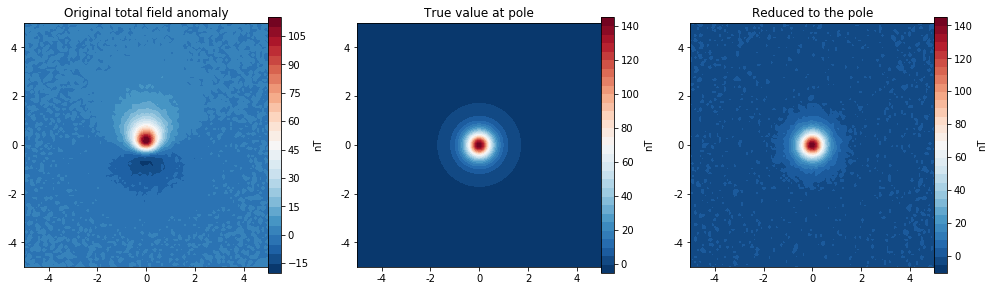

In [6]:
#画图
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
for ax in axes:
    ax.set_aspect('equal')
plt.sca(axes[0])
plt.title("Original total field anomaly")
giplt.contourf(y, x, tf, shape, 30, cmap=plt.cm.RdBu_r)
plt.colorbar(pad=0).set_label('nT')
giplt.m2km()
plt.sca(axes[1])
plt.title("True value at pole")
giplt.contourf(y, x, true, shape, 30, cmap=plt.cm.RdBu_r)
plt.colorbar(pad=0).set_label('nT')
giplt.m2km()
plt.sca(axes[2])
plt.title("Reduced to the pole")
giplt.contourf(y, x, pole, shape, 30, cmap=plt.cm.RdBu_r)
plt.colorbar(pad=0).set_label('nT')
giplt.m2km()
plt.tight_layout()
plt.show()